In [10]:
from typing import Union
import matplotlib.pyplot as plt
import numpy as np

### Objective function

In [30]:
gfloat = Union[float, np.ndarray]

def loss(a: gfloat, b: gfloat) -> gfloat:
    return (a - 1) ** 2 + (b - 2) ** 2

def grad_loss(a: gfloat, b: gfloat) -> tuple[gfloat, gfloat]:
    h = 1e-6
    l0 = loss(a, b)
    ga = (loss(a + h, b) - l0) / h
    gb = (loss(a, b + h) - l0) / h
    return ga, gb

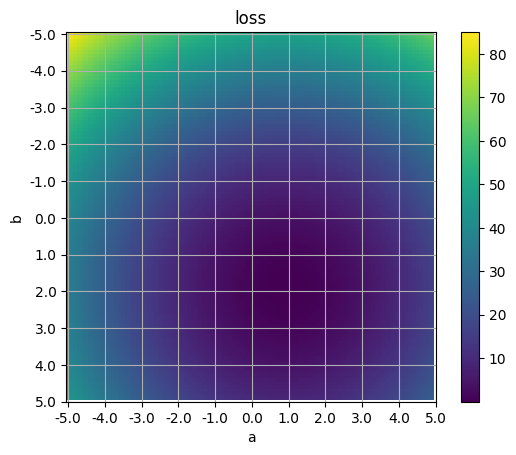

In [31]:
# visualization of the objective function
a = np.linspace(-5, 5, 100)  # x: 100
b = np.linspace(-5, 5, 100)  # y: 100
A, B = np.meshgrid(a, b)  # X: 100x100, Y: 100x100
C = loss(A, B)  # C: 100x100

plt.imshow(C)
plt.xticks(np.linspace(0, 100, 11), np.linspace(-5, 5, 11))
plt.yticks(np.linspace(0, 100, 11), np.linspace(-5, 5, 11))
plt.title("loss")
plt.xlabel('a')
plt.ylabel('b')
plt.colorbar()
plt.grid()
plt.show()

### Solve by gradient descent

i=0, a=0, b=0, loss=5
i=20, a=0.33239, b=0.66478, loss=2.2285
i=40, a=0.5543, b=1.1086, loss=0.99324
i=60, a=0.70245, b=1.40489, loss=0.44269
i=80, a=0.80135, b=1.6027, loss=0.19731
i=100, a=0.86738, b=1.73476, loss=0.08794
i=120, a=0.91146, b=1.82292, loss=0.0392
i=140, a=0.94089, b=1.88178, loss=0.01747
i=160, a=0.96054, b=1.92108, loss=0.00779
i=180, a=0.97365, b=1.94731, loss=0.00347
i=200, a=0.98241, b=1.96482, loss=0.00155
i=220, a=0.98826, b=1.97652, loss=0.00069
i=240, a=0.99216, b=1.98432, loss=0.00031
i=260, a=0.99477, b=1.98953, loss=0.00014
i=280, a=0.99651, b=1.99301, loss=6e-05
i=300, a=0.99767, b=1.99533, loss=3e-05
i=320, a=0.99844, b=1.99689, loss=1e-05
i=340, a=0.99896, b=1.99792, loss=1e-05
i=360, a=0.99931, b=1.99861, loss=0.0
i=380, a=0.99954, b=1.99907, loss=0.0


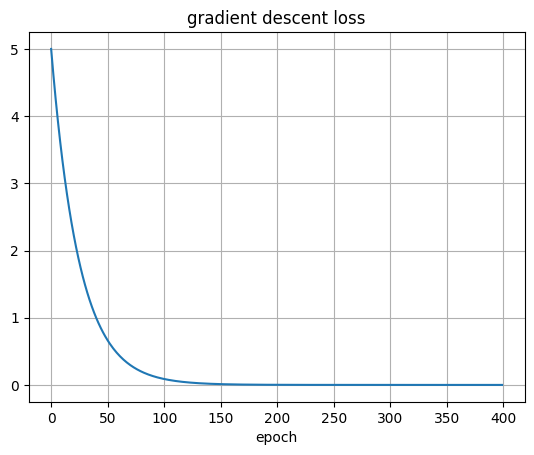

In [34]:
def get_new_params(a: float, b: float, lr: float) -> tuple[float, float]:
    ga, gb = grad_loss(a, b)
    a = a - lr * ga
    b = b - lr * gb
    return a, b

# initialization
a, b = 0, 0
lr, epochs = 1e-2, 400

# gradient descent
history = []  # (a, b, loss)
for i in range(epochs):
    l0 = loss(a, b)
    history.append([a, b, l0])
    if i % 20 == 0:
        print(f"i={i}, a={round(a, 5)}, b={round(b, 5)}, loss={round(l0, 5)}")
    a, b = get_new_params(a, b, lr)

plt.title("gradient descent loss")
plt.xlabel("epoch")
plt.plot([loss for _, _, loss in history])
plt.grid()
plt.show()